In [31]:
import matplotlib.pyplot as plt
import pandas as pd

In [32]:
original_train_df = pd.read_csv("../data/train_data.csv")
day_list_df = pd.read_csv("../data/WSalesPointsV2.csv")

In [33]:
original_train_df.head()

,CategoryCode,ItemCode,DateID,DailySales
0,category_2,117610,11/6/2021,7
1,category_4,836584,11/18/2021,16
2,category_1,370195,1/24/2022,6
3,category_2,172582,10/30/2021,5
4,category_2,1006009,10/30/2021,5


In [34]:
category_itemList_map = original_train_df.groupby(["CategoryCode"]).agg(list)[["ItemCode"]]
category_itemList_map = category_itemList_map.to_dict()['ItemCode']

In [35]:
for _key in category_itemList_map.keys():
    category_itemList_map[_key] = list(set(category_itemList_map[_key]))
    print(_key,len(category_itemList_map[_key]))
    # print(_key,category_itemList_map[_key])

category_1 67
category_2 90
category_3 22
category_4 15


In [36]:
plt.rcParams["figure.figsize"] = [20.00, 3.50]
plt.rcParams["figure.autolayout"] = True

In [37]:
def category_wise_graph(category_map):
    for __key in category_map.keys():
        print(__key)
        draw_multi_ts_graph(category_map[__key][:])


In [38]:
def draw_multi_ts_graph(lis_item_codes):
    for _it_co in lis_item_codes:
        product_series = day_list_df.loc[day_list_df["ItemCode"] == _it_co].iloc[0]
        plt.plot(eval(product_series["WeeklySales"]))

    plt.show()

category_1


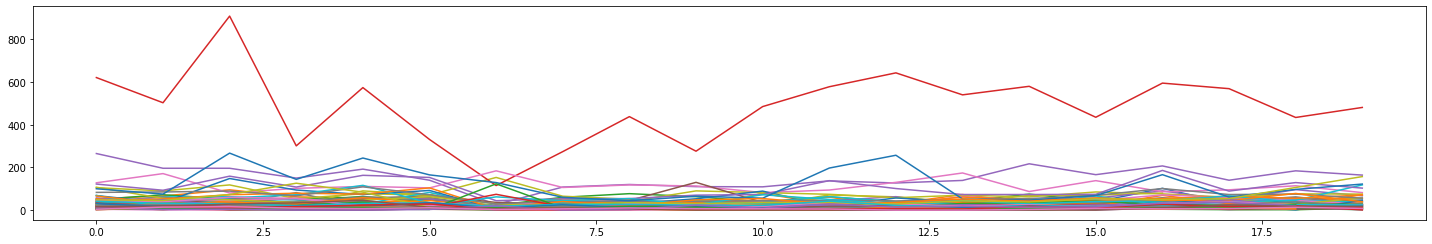

category_2


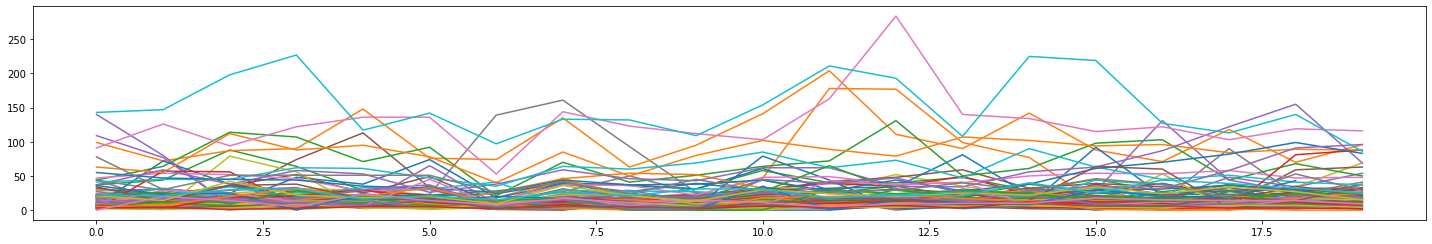

category_3


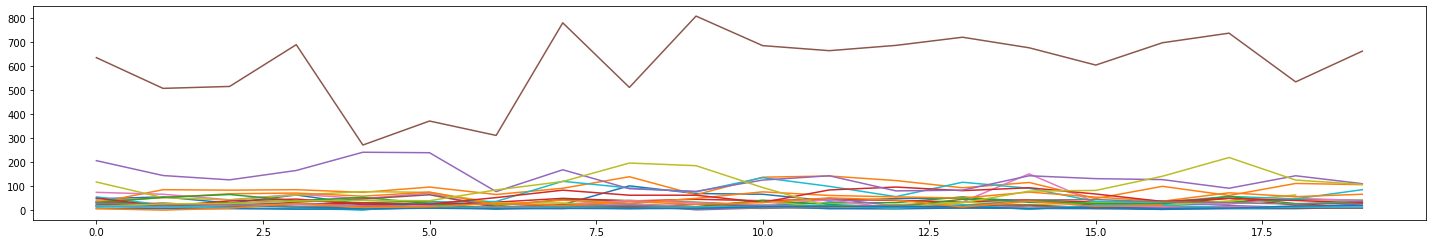

category_4


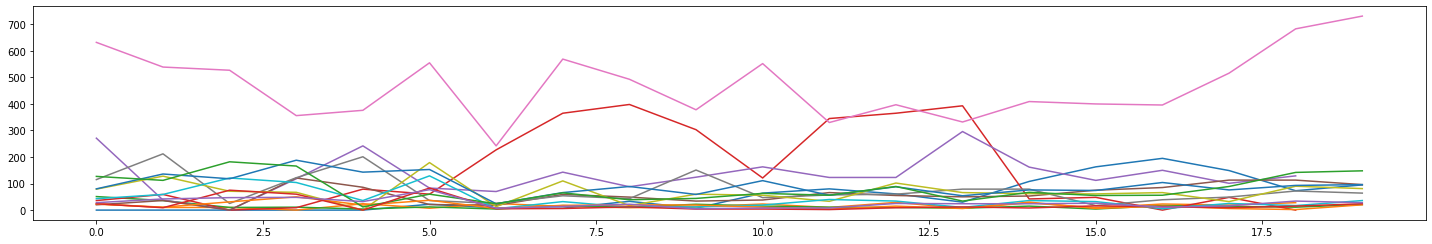

In [39]:
category_wise_graph(category_itemList_map)